In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize

In [7]:
df=pd.read_csv('abcnews-date-text.csv',error_bad_lines=False)
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [8]:
data_text=df[['headline_text']].astype('str')
data_text.shape

(1186018, 1)

In [14]:
stopw=stopwords.words('english')

In [16]:
stopw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
def stopwords_remove(x):
    terms=x.split()
    terms=[w for w in terms if w not in stopw]
    sentence=' '.join(terms)
    return sentence

In [35]:
data_text['Refined_headlines']=data_text['headline_text'].apply(lambda x:stopwords_remove(x))


In [36]:
data_text.head()

,headline_text,Refined_headlines,word_count
0,aba decides against community broadcasting lic...,aba decides community broadcasting licence,1
1,act fire witnesses must be aware of defamation,act fire witnesses must aware defamation,1
2,a g calls for infrastructure protection summit,g calls infrastructure protection summit,1
3,air nz staff in aust strike for pay rise,air nz staff aust strike pay rise,1
4,air nz strike to affect australian travellers,air nz strike affect australian travellers,1


In [37]:
def word_count(x):
    terms = x.split()
    return len(terms)
data_text['word_count']=data_text['Refined_headlines'].apply(lambda x: word_count(x))

In [38]:
data_text.head(20)

,headline_text,Refined_headlines,word_count
0,aba decides against community broadcasting lic...,aba decides community broadcasting licence,5
1,act fire witnesses must be aware of defamation,act fire witnesses must aware defamation,6
2,a g calls for infrastructure protection summit,g calls infrastructure protection summit,5
3,air nz staff in aust strike for pay rise,air nz staff aust strike pay rise,7
4,air nz strike to affect australian travellers,air nz strike affect australian travellers,6
5,ambitious olsson wins triple jump,ambitious olsson wins triple jump,5
6,antic delighted with record breaking barca,antic delighted record breaking barca,5
7,aussie qualifier stosur wastes four memphis match,aussie qualifier stosur wastes four memphis match,7
8,aust addresses un security council over iraq,aust addresses un security council iraq,6
9,australia is locked into war timetable opp,australia locked war timetable opp,5


In [39]:
data_text['word_count'].describe()

count    1.186018e+06
mean     5.378340e+00
std      1.443505e+00
min      0.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      6.000000e+00
max      1.200000e+01
Name: word_count, dtype: float64

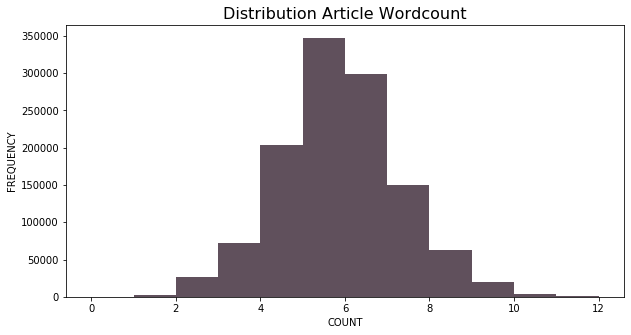

In [43]:
fig=plt.figure(figsize=(10,5))
plt.hist(data_text['word_count'],bins=12,color='#60505C')
plt.title("Distribution Article Wordcount",fontsize=16)
plt.ylabel('FREQUENCY')
plt.xlabel('COUNT')
plt.show()


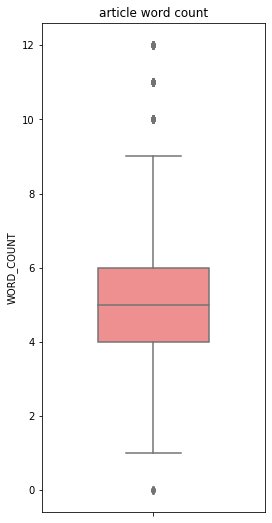

In [49]:
import seaborn as sns
fig=plt.figure(figsize=(4,9))
sns.boxplot(data_text['word_count'],orient='v',width=.5,color='#ff8080')
plt.ylabel('WORD_COUNT')
plt.title("article word count")
plt.show()


In [50]:
headline_sentences=[''.join(text)for text in data_text['Refined_headlines']]

In [55]:
vectorizer=CountVectorizer(analyzer='word',max_features=5000)
x_counts=vectorizer.fit_transform(headline_sentences)

In [59]:
x_counts.toarray().shape

MemoryError: Unable to allocate 900. GiB for an array with shape (1186018, 101872) and data type int64

In [60]:
transformer = TfidfTransformer(smooth_idf=False)
x_tfidf = transformer.fit_transform(x_counts)

In [61]:
x_tfidf

<1186018x101872 sparse matrix of type '<class 'numpy.float64'>'
	with 6351748 stored elements in Compressed Sparse Row format>

In [62]:
num_topics = 5
model = NMF(n_components = num_topics, init='nndsvd')
model.fit(x_tfidf)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [63]:
def get_nmf_topics(model, n_top_words):
    
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {}
    for i in range(num_topics):
        
        words_ids = model.components_[i].argsort()[:-n_top_words-1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic #'+'{:02d}'.format(i+1)] = words
        
    return pd.DataFrame(word_dict)

In [64]:
get_nmf_topics(model,10)

,Topic #01,Topic #02,Topic #03,Topic #04,Topic #05
0,man,police,new,abc,interview
1,charged,probe,govt,news,extended
2,court,investigate,council,rural,michael
3,murder,missing,says,national,nrl
4,crash,search,plan,business,john
5,accused,crash,us,weather,david
6,dies,death,water,market,smith
7,jailed,car,nsw,sport,james
8,woman,hunt,health,analysis,ben
9,car,fatal,australia,entertainment,scott
